<a href="https://colab.research.google.com/github/IEXE-Tec/analisis-descriptivo/blob/master/06_correlaciones_y_uso_de_visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importo las librerias que usare en este notebook
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


# Covarianza

En este notebook encontraras el codigo usando en clase. Te recomendamos jugar con el para entender mejor como funciona la covarianza y correlacion.

Generaremos una serie de variables apartir de diferentes distribuciones y ver que ocurre con nuestros estadisticos. 

Te recomendamos agregar visualizaciones para entender mejor lo que esta ocurriendo.


Observaras que modelamos el proceso generador de datos a traves de funciones del estilo:  
y = x + z  
y = f(x)

En la realidad es raro que observemos estas funciones, pues es lo que estamos tratando de estimar apartir de los datos. Sin embargo, visualizar el problema de esta forma nos ayudara a entenderlo mejor.

### Cov(x,x)

In [35]:
# X
x = np.random.normal(0, 1, 1000)
print('Covarianza entre X y X: ')
print(np.cov(x,x))
print(np.var(x))

Covarianza entre X y X: 
[[1.0510973 1.0510973]
 [1.0510973 1.0510973]]
1.0500462021239405


Nota como existe una pequena diferencia entre el valor calculado por los dos metodos {cov,var}. Cual crees que sea la razon? (Hint: Recuerda la correccion por sesgo) La respuesta esta en la celda de abajo.


In [36]:
# X
x = np.random.normal(0, 1, 1000)
print('Covarianza entre X y X: ')
# 
print(np.cov(x,x)*(1000-1)/1000)
print(np.var(x))

Covarianza entre X y X: 
[[0.94119043 0.94119043]
 [0.94119043 0.94119043]]
0.9411904268323282


Para efectos practicos esta correcion por sesgo no es tan importante, a menos que se tengan pocos datos. Es bueno tomarlo, en cuenta.

In [37]:
# X
x = np.random.normal(100, 10, 1000)
print('Covarianza entre X y X: ')
print(np.cov(x,x))
print(np.var(x))

Covarianza entre X y X: 
[[112.85984304 112.85984304]
 [112.85984304 112.85984304]]
112.74698319561745


### Cov(x,-x)




In [38]:
# X
x = np.random.normal(0, 1, 1000)
print('Covarianza entre X y X: ')
print(np.cov(x,-x))


Covarianza entre X y X: 
[[ 1.10240361 -1.10240361]
 [-1.10240361  1.10240361]]


### Covarianza entre x,y, z

In [39]:
# Variables que definen a Y
x = np.random.normal(0, 1, 1000)
z = np.random.normal(100, 10, 1000)

# Y
y = z**x

print('Covarianza entre Y & X: ')
print(np.cov(x,y))
print('-------------------')
print('Covarianza entre Y & Z: ')
print(np.cov(x,y))



Covarianza entre Y & X: 
[[9.55727182e-01 2.00694656e+04]
 [2.00694656e+04 9.72934388e+09]]
-------------------
Covarianza entre Y & Z: 
[[9.55727182e-01 2.00694656e+04]
 [2.00694656e+04 9.72934388e+09]]


In [40]:
# Variables que definen a Y
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 4, 1000)

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2
})
print('Covariance')
print(df.cov())
print('\n Correlation')
df.corr()

Covariance
          x1         x2
x1  0.977215   0.269978
x2  0.269978  14.617237

 Correlation


,x1,x2
x1,1.000000,0.071433
x2,0.071433,1.000000


In [41]:
x1 = np.random.normal(0, 1, 1000)
x2 = -1.0*x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
})

df.corr()


,x1,x2
x1,1.0,-1.0
x2,-1.0,1.0


In [42]:
x1 = np.random.normal(0, 1, 1000)
x2 = 3*x1
x3 = 1.0/x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

df.corr()

,x1,x2,x3
x1,1.000000,1.000000,0.014382
x2,1.000000,1.000000,0.014382
x3,0.014382,0.014382,1.000000


### No linealidad

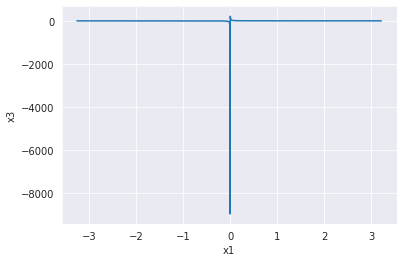

In [43]:
  
x1 = np.random.normal(0, 1, 1000)
x2 = 3*x1 
x3 = 1.0/x1 

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

sns.lineplot(x="x1", y="x3", data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


,x1,x2,x3
x1,1.000000,0.006635,0.118923
x2,0.006635,1.000000,0.028182
x3,0.118923,0.028182,1.000000


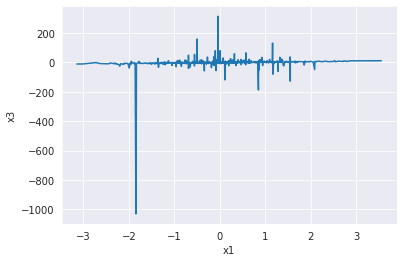

In [44]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = 3*x1 + 1.0/x2 

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

print(sns.lineplot(x="x1", y="x3", data=df))
df.corr()



AxesSubplot(0.125,0.125;0.775x0.755)


,x1,x2,x3
x1,1.000000,-0.011930,0.999948
x2,-0.011930,1.000000,-0.001742
x3,0.999948,-0.001742,1.000000


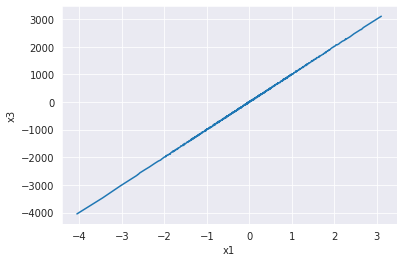

In [45]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = 1000*x1 + 10*(x2)

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

print(sns.lineplot(x="x1", y="x3", data=df))
df.corr()



AxesSubplot(0.125,0.125;0.775x0.755)


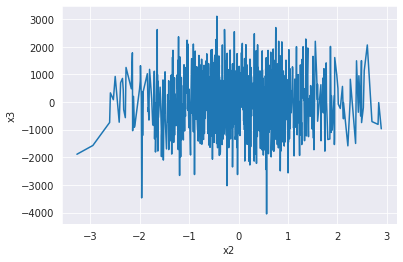

In [46]:
print(sns.lineplot(x="x2", y="x3", data=df))

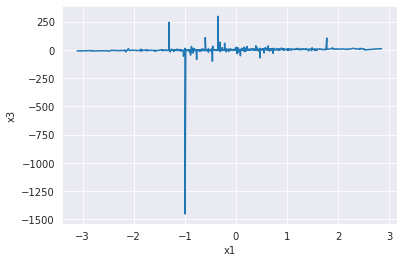

In [47]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = 3*x1 + 1.0/x2 

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
    'x3':x3
})

sns.lineplot(x="x1", y="x3", data=df)

In [59]:
# Correlaciones en relaciones no lineales
x1 = np.random.normal(0, 1, 1000)
x2 = -1.0/x1

df = pd.DataFrame.from_dict({
    'x1':x1,
    'x2':x2,
})

df.corr()

,x1,x2
x1,1.000000,-0.035718
x2,-0.035718,1.000000


### Correlacion y Covarianza

Piensa cual es mas facil de interpretar!

In [58]:
# Variables que definen a Y
x = np.random.normal(0, 1, 1000)
z = np.random.normal(100, 10, 1000)

# Y
y = z**x

print('Covarianza entre X & Y: ')
print(np.cov(x,y))
print('-------------------------------')
print('Correlacion entre X & Y:')
print(np.corrcoef(x,y))


Covarianza entre X & Y: 
[[1.00542295e+00 4.61374816e+03]
 [4.61374816e+03 6.10081449e+08]]
-------------------------------
Correlacion entre X & Y:
[[1.        0.1862883]
 [0.1862883 1.       ]]


In [55]:
# Variables que definen a Y
x = np.random.normal(0, 1, 1000)
z = np.random.normal(100, 10, 1000)

# Y
y = z*x

print('Covarianza entre X & Y: ')
print(np.cov(x,y))
print('\n Correlacion entre X & Y: ')
print( np.corrcoef(x,y))


Covarianza entre X & Y: 
[[9.78096852e-01 9.84001658e+01]
 [9.84001658e+01 9.99692314e+03]]

 Correlacion entre X & Y: 
[[1.         0.99511145]
 [0.99511145 1.        ]]


# Tarea

In [63]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [64]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [65]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [66]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Hmmmmmm....  
Tendemos mucho a usar estas funciones, talvez sea conveniente crear una funcion. Esto no solo nos ahorra tiempo, sino que nos ayudara a evitar errores, y a mejorar la "redaccion" de nuestro codigo.

In [73]:
def glimpse_df(df):
  print('Head:')
  print(df.head())
  print('\n Info: ')
  print(df.info())
  print('\n Describe:')
  print(df.describe())

In [74]:
glimpse_df(penguins)

Head:
  species     island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen              36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g   

In [76]:
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## Observa las correlaciones anteriores.  
Que relaciones hay entre cada una de las variables?  